In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics  import mean_squared_error , r2_score

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(value = df['dropoff_longitude'].mean())

In [8]:
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(value = df['dropoff_latitude'].mean())

In [11]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
df["distance"] = ((
    (df['dropoff_latitude']-df['pickup_latitude'])**2+(df['dropoff_longitude']-df['pickup_longitude'])**2)**0.5)

In [14]:
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
df = df[df['distance'] < 5]

In [17]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

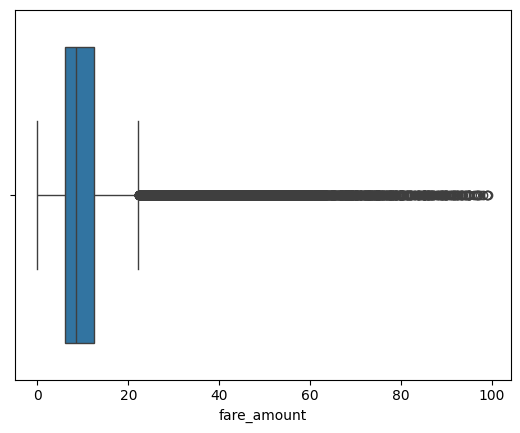

In [20]:
sns.boxplot(x=df['fare_amount'])
plt.show()

In [21]:
corr = df[['fare_amount' , 'passenger_count' , 'hour' , 'day_of_week' , 'distance']].corr()

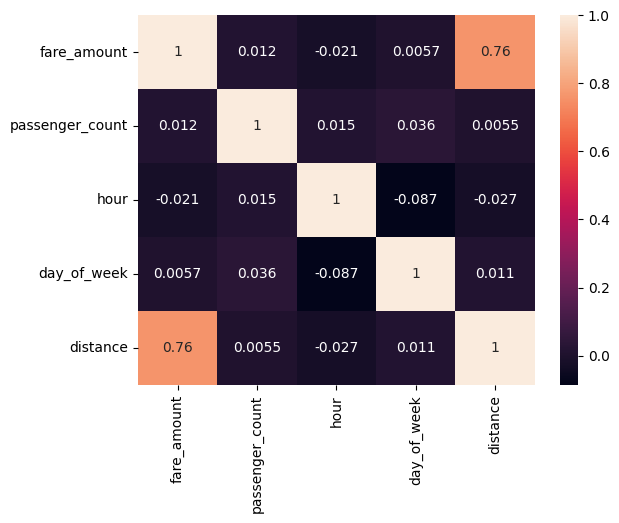

In [26]:
sns.heatmap(corr , annot = True)
plt.show()

In [27]:
X = df[['passenger_count' , 'hour' , 'day_of_week' , 'distance']]
Y = df['fare_amount']

In [28]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

In [29]:
lr = LinearRegression()
lr.fit(X_train , Y_train)
lr_y_pred = lr.predict(X_test)

In [31]:
rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)
rf.fit(X_train , Y_train)
rf_y_pred = rf.predict(X_test)

In [34]:
def evaluate(y_true , y_pred , model_name):
    rmse = np.sqrt(mean_squared_error(y_true , y_pred))
    r2 = r2_score(y_true , y_pred)
    print(f"{model_name} Results : ")
    print(f"r2 = {r2}")
    print(f"rmse = {rmse}")

In [35]:
evaluate(Y_test , lr_y_pred , "LinearRegression" )

LinearRegression Results : 
r2 = 0.5112489833167979
rmse = 6.542799567282576


In [36]:
evaluate(Y_test , rf_y_pred , "RandomForest" )

RandomForest Results : 
r2 = 0.7562779454666972
rmse = 4.620268286831754
